In [ ]:
#import some library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importing data into G colab
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
#importing data into G colab
import io
data = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))
#starting 5 rows
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.shape

(1470, 35)

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- No missing value present. (from count row)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Data Analysis

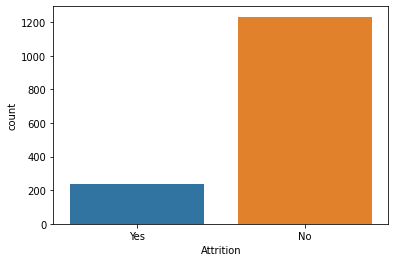

In [ ]:
sns.countplot(data['Attrition'])

Our target variable is imbalanced. So, we will treat it by oversampling or undersampling.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


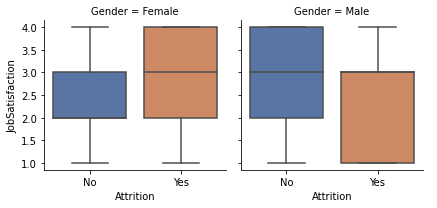

In [ ]:
## Distribution of JOb Satisfaction
grid = sns.FacetGrid(data, col = 'Gender')
grid.map(sns.boxplot, 'Attrition', 'JobSatisfaction', palette = 'deep')
grid.add_legend()
# sns.boxplot(x = 'Attrition', y = 'JobSatisfaction', data = data, hue = 'Gender')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


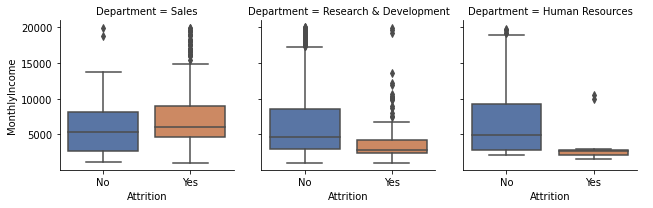

In [ ]:
grid = sns.FacetGrid(data, col = 'Department')
grid.map(sns.boxplot, 'Attrition', 'MonthlyIncome', palette = 'deep')
grid.add_legend()

Sales department has more attrition inspite of having good income.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


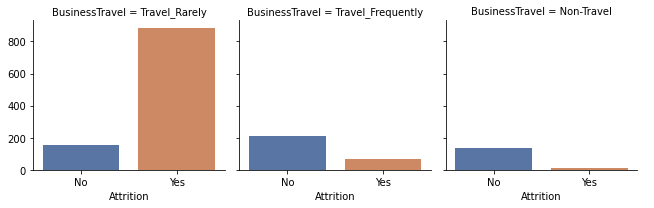

In [ ]:
grid = sns.FacetGrid(data= data, col = 'BusinessTravel')
grid.map(sns.countplot, 'Attrition', palette = 'deep') #palette = 'bright'
grid.add_legend()

Ones who travels rarely has more attrition.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


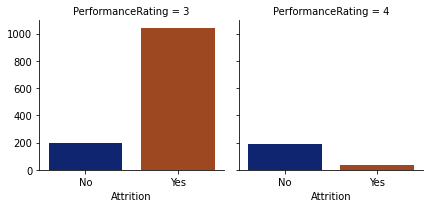

In [ ]:
#ploting PerformanceRating
grid = sns.FacetGrid(data, col = 'PerformanceRating')
grid.map(sns.countplot, 'Attrition', palette = 'dark')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


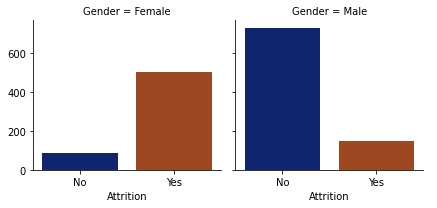

In [ ]:
#ploting Gender
grid = sns.FacetGrid(data, col = 'Gender')
grid.map(sns.countplot, 'Attrition', palette = 'dark')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


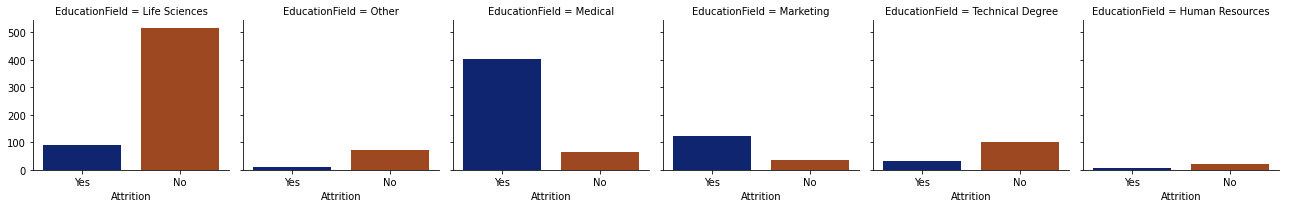

In [ ]:
#ploting EducationField
grid = sns.FacetGrid(data, col = 'EducationField')
grid.map(sns.countplot, 'Attrition', palette = 'dark')
grid.add_legend()

In [ ]:
 #encoding attrition into numerical by apply function
 target_map = {'Yes':1, "No":0}
 data["AttritionNum"] = data["Attrition"].apply(lambda x:target_map[x])

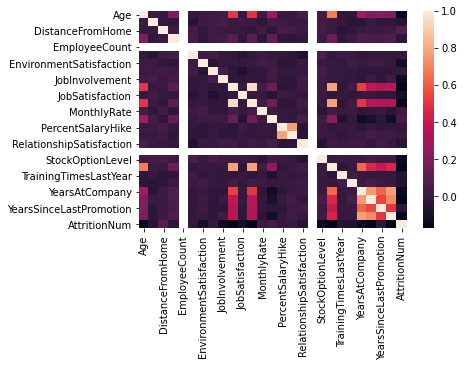

In [ ]:
sns.heatmap(data.corr())

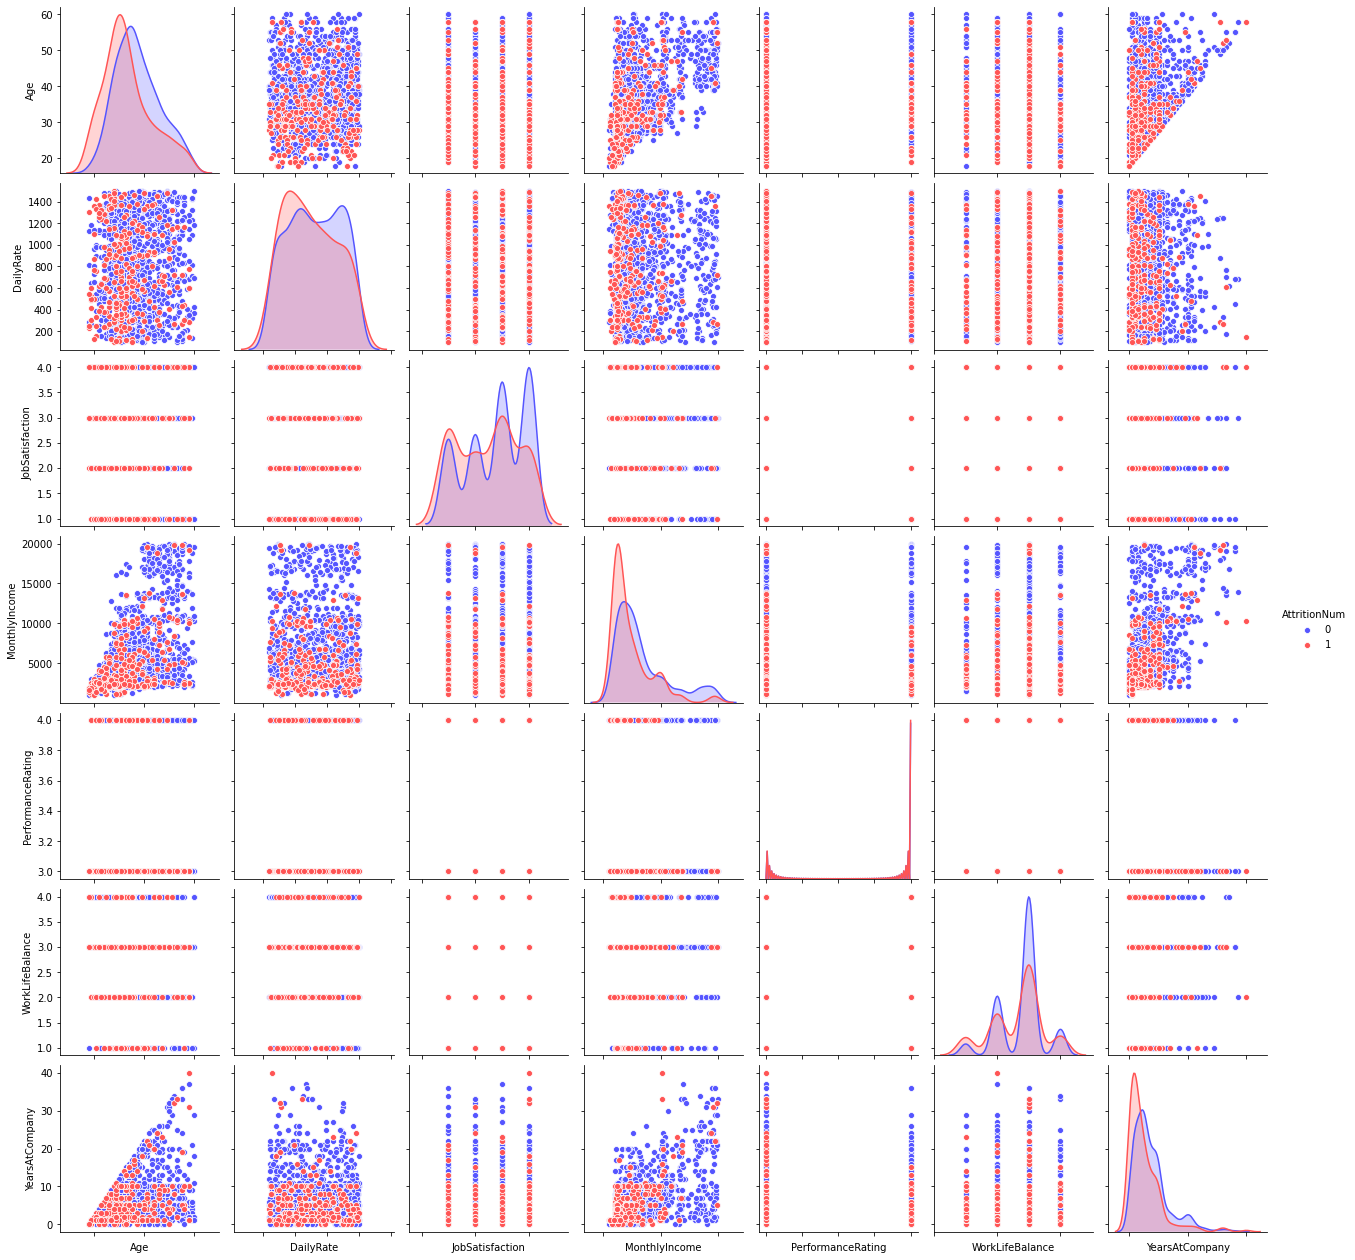

In [ ]:
#from kaggle notebook
# Refining our list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'AttritionNum']

g = sns.pairplot(data[numerical], hue='AttritionNum', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

### Feature Engineering

In [ ]:
data.drop(["AttritionNum"], axis = 1, inplace = True)

In [ ]:
#Encoding some features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
feat_enc = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for feat in feat_enc:
  data[feat] = label_encoder.fit_transform(data[feat])


In [ ]:
# data['Over18'] = pd.get_dummies(data['Over18'])

In [ ]:
data.drop(["Over18", 'EmployeeCount', 'StandardHours'], axis = 1, inplace=True)

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


### Model Building

In [ ]:
#separting indpendent and dependent varriable
y = data["Attrition"]
x = data.drop(["Attrition"],axis = 1)

In [ ]:
# # splitting of the data
# from sklearn.model_selection import train_test_split
# train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0, train_size = 0.80)

In [ ]:
#spitting data using k-fold validation
from sklearn.model_selection import KFold
# kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
kf = KFold(n_splits=5)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
      print("Train:", train_index, "Validation:",test_index)
      train_x, test_x = x.iloc[train_index], x.iloc[test_index]
      train_y, test_y = y.iloc[train_index], y.iloc[test_index]

Train: [ 294  295  296 ... 1467 1468 1469] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

In [ ]:
#From Kaggle notebook
#Since our data is imbalanced
#Using SMOTE to oversample due to the skewness in y
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
smote_train.shape, smote_target.shape

((1964, 31), (1964,))

In [ ]:
smote_train

array([[  41,    2, 1102, ...,    4,    0,    5],
       [  49,    1,  279, ...,    7,    1,    7],
       [  37,    2, 1373, ...,    0,    0,    0],
       ...,
       [  33,    2, 1110, ...,    7,    6,    4],
       [  31,    2,  325, ...,    2,    6,    7],
       [  41,    1,  858, ...,    1,    0,    1]])

### 1. Random Forest Classifier

In [ ]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## From Kaggle notebook
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : 0,
    'verbose': 0
}
rf = RandomForestClassifier(**rf_params)

In [ ]:
rs_params = {
    # 'n_jobs': -1,
    'n_estimators': [200, 400, 600, 800, 1000],
    'max_features': ['log2', 'sqrt', 0.3],
    'max_depth': [3,4,5,6,7,8],
    'min_samples_leaf': [2,3,4,5,6]
    # 'max_features' : 'sqrt',
    # 'random_state' : seed,
    # 'verbose': 0
}

In [ ]:
#suggested by Rupali mam
random_search = RandomizedSearchCV(rf,param_distributions=rs_params,scoring='roc_auc',n_iter =5,n_jobs=-1,verbose=0,cv=5)
random_search.fit(smote_train, smote_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=4,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                  

In [ ]:
random_search.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'n_estimators': 200}

In [ ]:
#using best parameters
rf = RandomForestClassifier(max_depth=8,max_features= 'log2',min_samples_leaf=4,n_estimators= 200)

In [ ]:
rf.fit(smote_train, smote_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#prediction on training data
rf_predictions_tr = rf.predict(train_x)
print("Scores on training data\n")
print("Accuracy score: {}".format(accuracy_score(train_y, rf_predictions_tr)))
print("="*80)
print(classification_report(train_y, rf_predictions_tr))

Scores on training data

Accuracy score: 0.9311224489795918
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       982
           1       0.78      0.81      0.80       194

    accuracy                           0.93      1176
   macro avg       0.87      0.88      0.88      1176
weighted avg       0.93      0.93      0.93      1176



In [ ]:
#prediction on testing data
print("Scores on testing data\n")
rf_predictions_tst = rf.predict(test_x)
print("Accuracy score: {}".format(accuracy_score(test_y, rf_predictions_tst)))
print("="*80)
print(classification_report(test_y, rf_predictions_tst))

Scores on testing data

Accuracy score: 0.8401360544217688
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       251
           1       0.44      0.37      0.41        43

    accuracy                           0.84       294
   macro avg       0.67      0.65      0.66       294
weighted avg       0.83      0.84      0.83       294



In [ ]:
importances = rf.feature_importances_
importances

array([0.03334036, 0.0274598 , 0.0296038 , 0.0033818 , 0.02094318,
       0.03023661, 0.01000727, 0.02918988, 0.07936657, 0.00799949,
       0.02839509, 0.08912052, 0.04376512, 0.01766887, 0.06153513,
       0.01461334, 0.05411628, 0.02811902, 0.01384611, 0.01035657,
       0.01518658, 0.00782831, 0.02993449, 0.10568327, 0.04689319,
       0.02029471, 0.02501959, 0.03095722, 0.03109585, 0.01721004,
       0.03683194])

In [ ]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
std

array([0.02777685, 0.02995331, 0.01881562, 0.00607726, 0.01344734,
       0.02762019, 0.01012351, 0.01799499, 0.05134245, 0.01057627,
       0.01625897, 0.06069652, 0.05088854, 0.01281307, 0.04219622,
       0.01751045, 0.03778551, 0.01526989, 0.01187561, 0.01144159,
       0.01138421, 0.01186501, 0.02387874, 0.07002921, 0.04437936,
       0.01775731, 0.02102212, 0.03241674, 0.0314582 , 0.01305874,
       0.03681878])

In [ ]:
indices = np.argsort(importances)[::-1]
indices

array([23, 11,  8, 14, 16, 24, 12, 30,  0, 28, 27,  5, 22,  2,  7, 10, 17,
        1, 26,  4, 25, 13, 29, 20, 15, 18, 19,  6,  9, 21,  3])

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(smote_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 23 (0.105683)
2. feature 11 (0.089121)
3. feature 8 (0.079367)
4. feature 14 (0.061535)
5. feature 16 (0.054116)
6. feature 24 (0.046893)
7. feature 12 (0.043765)
8. feature 30 (0.036832)
9. feature 0 (0.033340)
10. feature 28 (0.031096)
11. feature 27 (0.030957)
12. feature 5 (0.030237)
13. feature 22 (0.029934)
14. feature 2 (0.029604)
15. feature 7 (0.029190)
16. feature 10 (0.028395)
17. feature 17 (0.028119)
18. feature 1 (0.027460)
19. feature 26 (0.025020)
20. feature 4 (0.020943)
21. feature 25 (0.020295)
22. feature 13 (0.017669)
23. feature 29 (0.017210)
24. feature 20 (0.015187)
25. feature 15 (0.014613)
26. feature 18 (0.013846)
27. feature 19 (0.010357)
28. feature 6 (0.010007)
29. feature 9 (0.007999)
30. feature 21 (0.007828)
31. feature 3 (0.003382)


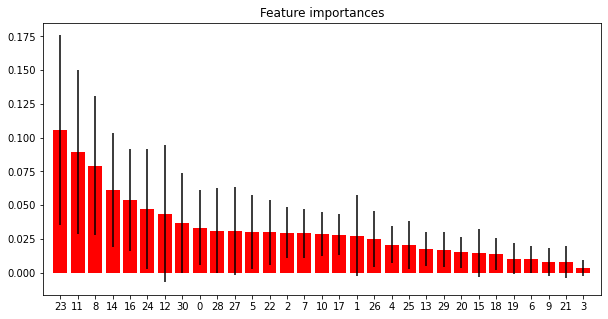

In [ ]:
# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(smote_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(smote_train.shape[1]), indices)
plt.xlim([-1, smote_train.shape[1]])
plt.show()

In [ ]:
print(data.columns[22])
print(data.columns[10])
print(data.columns[7])

PerformanceRating
Gender
EducationField


In [ ]:
# # Feature importance
# feat_imp = pd.Series(importances, index = smote_train.values)
# feat_imp.sort()
# feat_imp.plot(kind = 'barh', figsize = (7,6))

### 2. Gradient Boosted Classifier

In [ ]:
#From Kaggle notebook
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 0,
    'verbose': 0
}
gb = GradientBoostingClassifier(**gb_params)


In [ ]:
#choosing parameters
rs_params2 ={
    'n_estimators': [x for x in range(100,301,100)],
    'max_features': ['sqrt', 'log2',0.9],
    'learning_rate' : [0.001,0.003,0.01],
    'max_depth': [3,4,5,6],
    'min_samples_leaf': [2,3,4,5,6]
}
random_search2 = RandomizedSearchCV(gb,param_distributions=rs_params2,scoring='roc_auc',n_jobs=-1,verbose=0,cv=5)
random_search2.fit(smote_train, smote_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.25,
                                                        loss='deviance',
                                                        max_depth=4,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=2,
                                                        min_samples_split=2,
                                                 

In [ ]:
random_search2.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [ ]:
#using best parameters
gb = GradientBoostingClassifier(learning_rate=0.01,max_depth=6,max_features='log2',min_samples_leaf=2,n_estimators=300)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#prediction on training data
gb_predictions_tr = gb.predict(train_x)
print("Scores on training data\n")
print("Accuracy score: {}".format(accuracy_score(train_y, gb_predictions_tr)))
print("="*80)
print(classification_report(train_y, gb_predictions_tr))

Scores on training data

Accuracy score: 0.9710884353741497
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       982
           1       0.90      0.93      0.91       194

    accuracy                           0.97      1176
   macro avg       0.94      0.96      0.95      1176
weighted avg       0.97      0.97      0.97      1176



In [ ]:
from sklearn.metrics import f1_score
score_f1 = f1_score(train_y, gb_predictions_tr)
score_f1

0.914141414141414

In [ ]:
#prediction on testing data
print("Scores on testing data\n")
gb_predictions_tst = gb.predict(test_x)
print("Accuracy score: {}".format(accuracy_score(test_y, gb_predictions_tst)))
print("="*80)
print(classification_report(test_y, gb_predictions_tst))

Scores on testing data

Accuracy score: 0.8503401360544217
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       251
           1       0.48      0.35      0.41        43

    accuracy                           0.85       294
   macro avg       0.69      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294



In [ ]:
importances2 = gb.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices2 = np.argsort(importances2)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(smote_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices2[f], importances2[indices2[f]]))

Feature ranking:
1. feature 23 (0.101706)
2. feature 11 (0.092539)
3. feature 8 (0.084003)
4. feature 14 (0.065297)
5. feature 16 (0.050855)
6. feature 12 (0.050544)
7. feature 24 (0.039287)
8. feature 1 (0.034176)
9. feature 22 (0.032141)
10. feature 28 (0.031321)
11. feature 17 (0.030447)
12. feature 26 (0.029666)
13. feature 7 (0.029614)
14. feature 2 (0.028831)
15. feature 5 (0.028693)
16. feature 30 (0.026784)
17. feature 10 (0.025271)
18. feature 0 (0.025142)
19. feature 25 (0.025043)
20. feature 27 (0.024320)
21. feature 19 (0.019188)
22. feature 4 (0.018870)
23. feature 13 (0.018083)
24. feature 15 (0.016662)
25. feature 29 (0.016223)
26. feature 18 (0.013282)
27. feature 21 (0.012394)
28. feature 20 (0.010850)
29. feature 6 (0.009053)
30. feature 9 (0.007004)
31. feature 3 (0.002713)


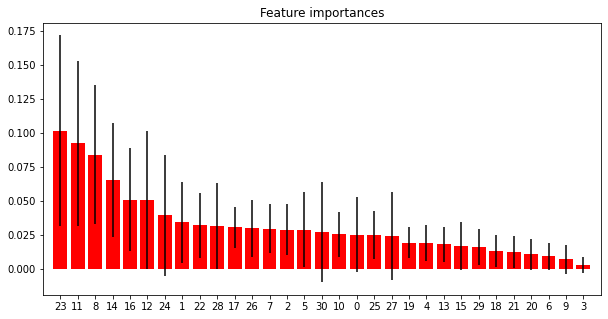

In [ ]:
# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(smote_train.shape[1]), importances2[indices2],
       color="r", yerr=std2[indices2], align="center")
plt.xticks(range(smote_train.shape[1]), indices2)
plt.xlim([-1, smote_train.shape[1]])
plt.show()

In [ ]:
print(data.columns[22])
print(data.columns[10])
print(data.columns[7])

PerformanceRating
Gender
EducationField


Above three are important features for attrition of employees from companies.
- Ones having less PerformanceRating have high attrtion rates.
- Females have high attrition rates.
- Medical education field has highest attrition rate.


## 3. XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 200,min_child_weight =5,learning_rate =  0.25, colsample_bytree = 0.5,max_depth =9,gamma = 0.4)

In [ ]:
rs_params = {
    "n_estimators":[x for x in range(100,301,100)],
    "max_depth":[2,3,4,5,7,8],
    "gamma":[0.1,0.2,0.3,0.4,0.5],
    "min_child_weight":[1,3,5,7],
    "colsample_bytree":[0.2,0.3,0.5,0.6,0.8],
    "learning_rate":[0.001,0.03,0.01]
}
from sklearn.model_selection import RandomizedSearchCV
random_search3 = RandomizedSearchCV(xgb,param_distributions=rs_params,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=0,cv=5)
random_search3.fit(smote_train, smote_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.5, gamma=0.4,
                                           learning_rate=0.25, max_delta_step=0,
                                           max_depth=9, min_child_weight=5,
                                           missing=None, n_estimators=200,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.5, 0.6,
                                       

In [ ]:
random_search3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search3.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100}

In [ ]:
#using best parameters
xgb = XGBClassifier(colsample_bytree=0.5,gamma=0.1,learning_rate=0.01,max_depth=4,min_child_weight=1,n_estimators=100)

In [ ]:
# By Rupali mam
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()

In [ ]:
xgb.fit(smote_train,smote_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#prediction on training data
xgb_predictions_tr = xgb.predict(train_x)
print("Scores on training data\n")
print("Accuracy score: {}".format(accuracy_score(train_y, xgb_predictions_tr)))
print("="*80)
print(classification_report(train_y, xgb_predictions_tr))

Scores on training data

Accuracy score: 0.8528911564625851
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       982
           1       0.55      0.62      0.58       194

    accuracy                           0.85      1176
   macro avg       0.74      0.76      0.75      1176
weighted avg       0.86      0.85      0.86      1176



In [ ]:
#prediction on testing data
print("Scores on testing data\n")
xgb_predictions_tst = xgb.predict(test_x)
print("Accuracy score: {}".format(accuracy_score(test_y, xgb_predictions_tst)))
print("="*80)
print(classification_report(test_y, xgb_predictions_tst))

Scores on testing data

Accuracy score: 0.8095238095238095
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       251
           1       0.37      0.42      0.39        43

    accuracy                           0.81       294
   macro avg       0.63      0.65      0.64       294
weighted avg       0.82      0.81      0.81       294



In [ ]:
importances3 = xgb.feature_importances_
std3 = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices3 = np.argsort(importances3)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(smote_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices3[f], importances3[indices3[f]]))

Feature ranking:
1. feature 23 (0.211601)
2. feature 11 (0.084409)
3. feature 12 (0.073014)
4. feature 14 (0.071738)
5. feature 8 (0.057272)
6. feature 15 (0.040145)
7. feature 5 (0.033350)
8. feature 22 (0.032411)
9. feature 28 (0.029768)
10. feature 1 (0.027836)
11. feature 24 (0.026868)
12. feature 26 (0.025088)
13. feature 25 (0.024054)
14. feature 30 (0.022537)
15. feature 21 (0.022272)
16. feature 16 (0.021846)
17. feature 0 (0.017630)
18. feature 19 (0.017257)
19. feature 7 (0.014693)
20. feature 27 (0.014531)
21. feature 13 (0.013772)
22. feature 10 (0.013680)
23. feature 17 (0.013368)
24. feature 6 (0.013225)
25. feature 2 (0.013062)
26. feature 4 (0.012612)
27. feature 18 (0.012498)
28. feature 9 (0.012024)
29. feature 29 (0.010509)
30. feature 20 (0.009356)
31. feature 3 (0.007576)


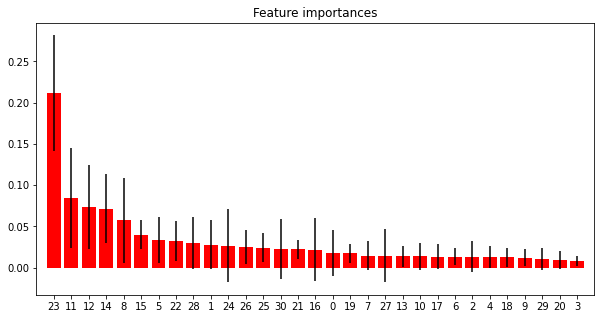

In [ ]:
# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(smote_train.shape[1]), importances3[indices3],
       color="r", yerr=std3[indices3], align="center")
plt.xticks(range(smote_train.shape[1]), indices3)
plt.xlim([-1, smote_train.shape[1]])
plt.show()

In [ ]:
print(data.columns[22])
print(data.columns[10])
print(data.columns[11])

PerformanceRating
Gender
HourlyRate


In [ ]:
# Taking cross validation score of model having best accuracy i,e. Gradient boosting model on testing data
from sklearn.model_selection import cross_val_score
score = cross_val_score(gb, smote_train, smote_target, cv = 10)
score

array([0.69035533, 0.72081218, 0.94416244, 0.95939086, 0.91326531,
       0.8877551 , 0.92346939, 0.92346939, 0.93367347, 0.8622449 ])

In [ ]:
score.mean()

0.8758598363203148

from gradient boosting model(haaving highest accuracy), three are important features for attrition of employees from companies.
- Ones having less PerformanceRating have high attrtion rates.
- Females have high attrition rates.
- Medical education field has highest attrition rate.